## Задача 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline

## Cauchy problem:

$\frac{dx}{dt} = -x, \ x(0) = 1, \ 0 < t < 3$ 

$\frac{dx}{x} = -dt$

$\ln(Cx) = -t$

$Cx(t) = e^{-t}$

$x(t) = A \cdot e^{-t} \ [x(0)=1]$

$x(t)=e^{-t}$

**Lets plot solution!**

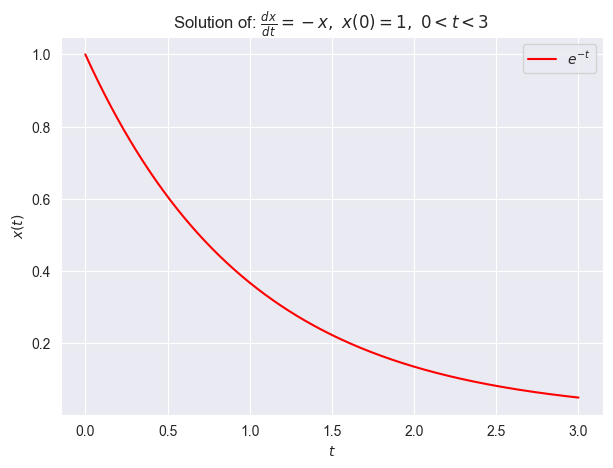

In [2]:
t = np.linspace(0, 3, 1000)
x = np.exp(-t)

plt.figure(figsize=(7, 5), dpi=100)
plt.plot(t, x, '-r',label=r'$e^{-t}$')
plt.title(r"Solution of: $\frac{dx}{dt} = -x, \ x(0) = 1, \ 0 < t < 3$ ")
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.legend(loc='best')
plt.show()

## Some abstractions:

**$\frac{dx}{dt}=f(t, x(t))$**

**$a \leq t \leq b$**

**$x(a) = x_0$**

### So, in our problem:

**$f(t, x(t)) = -x$**

**$a = 0$**

**$b = 3$**

**$x_0 = 1$**

## Note: **$u(t)$ – approximation of exact solution $x(t)$**

## Euler method: ***1-st order of precision***

**Very simple idea:**

$u_{n+1} = u_{n} + h \cdot f(t_{n}, u_{n}) \ where \ h = t_{n+1} - t_{n}$

In [3]:
def Euler(u, f, t, dt):
    return u + f(t, u) * dt

In [4]:
f = lambda t, x: -x
a = 0
b = 3
x0 = 1

t = np.linspace(a, b, 1000)
u = np.zeros(len(t)) # t – domain (time)

u[a] = x0 # Cauchy condition 

### Euler:

In [5]:
for i in range(len(u) - 1):
    h = t[i + 1] - t[i]
    u[i + 1] = Euler(u[i], f, t[i], h)

### Plot Euler

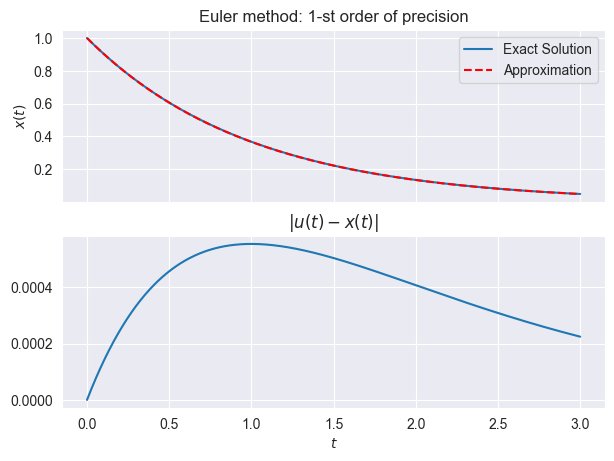

In [6]:
fg, ax = plt.subplots(2, 1, figsize=(7, 5), dpi=100, sharex=True)
ax[0].set_title("Euler method: 1-st order of precision")
ax[0].plot(t, np.exp(-t), label='Exact Solution')
ax[0].plot(t, u, '--r', label='Approximation')
ax[0].legend(loc='best')
ax[0].set_ylabel(r"$x(t)$")

eulerError = np.abs(x - u)

ax[1].plot(t, eulerError)
ax[1].set_xlabel(r"$t$")
ax[1].set_title(r"$|u(t) - x(t)|$")
plt.show()

## Runge-Kutta: ***2-nd order of precision***

**Little complicated idea:**

$u_{n+1} = u_{n} + h \cdot [(1-\alpha)f(t_{n}, u_{n}) + \alpha f(t_{n} + \frac{h}{2\alpha}, u_{n} + \frac{h}{2\alpha}f(t_{n}, u_{n}))] \ where \ \alpha = \frac{3}{4}$ for second order of precision

### Runge-Kutta 2nd:

In [7]:
def RK2(u, f, t, dt):
    alpha = 3 / 4
    C = dt / (2 * alpha)
    k1 = f(t, u)
    k2 = f(t + C, u + C * k1)
    return u + dt * ((1 - alpha) * k1  + alpha * k2)

In [8]:
alfa = 3 / 4 # for 2-nd order of precision in Runge-Kutta

for i in range(len(u) - 1):
    h = t[i + 1] - t[i]
    u[i + 1] = RK2(u[i], f, t[i], h)

### Plot Runge-Kutta 2nd

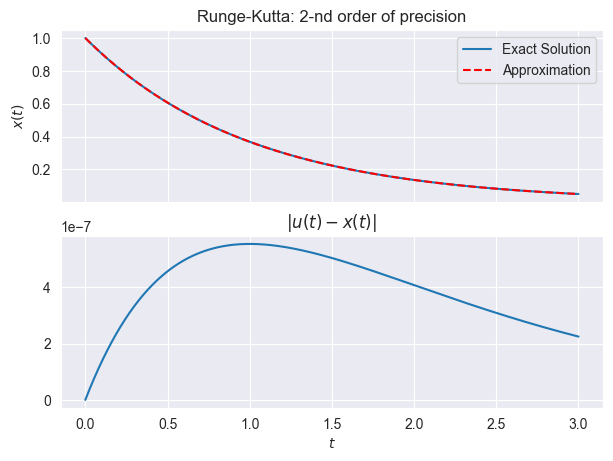

In [9]:
fg, ax = plt.subplots(2, 1, figsize=(7, 5), dpi=100, sharex=True)
ax[0].set_title("Runge-Kutta: 2-nd order of precision")
ax[0].plot(t, np.exp(-t), label='Exact Solution')
ax[0].plot(t, u, '--r', label='Approximation')
ax[0].legend(loc='best')
ax[0].set_ylabel(r"$x(t)$")

runge_kutta2Error = np.abs(x - u)

ax[1].plot(t, runge_kutta2Error)
ax[1].set_xlabel(r"$t$")
ax[1].set_title(r"$|u(t) - x(t)|$")
plt.show()

## Runge-Kutta: ***4-th order of precision***

**Gigachad idea:**

$u_{n+1} = u_n + \frac{h}{6}[k_1 + 2k_2 + 2k_3 + k_4]$

**where:**

$k_1 = f(t_n, u_n)$

$k_2 = f(t_n + \frac{h}{2}, u_n + \frac{h}{2} \cdot k1)$

$k_3 = f(t_n + \frac{h}{2}, u_n + \frac{h}{2} \cdot k2)$

$k_4 = f(t_n + h, u_n + h \cdot k_3)$

### Runge-Kutta 4th

In [10]:
def RK4(u, f, t, dt):
    k1 = f(t, u)
    k2 = f(t + (dt/2), u + (dt/2) * k1)
    k3 = f(t + (dt/2), u + (dt/2) * k2)
    k4 = f(t + dt, u + dt * k3)
    return u + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

In [11]:
for i in range(len(u) - 1):
    h = t[i + 1] - t[i]
    k1 = f(t[i], u[i])
    k2 = f(t[i] + (h/2), u[i] + (h/2) * k1)
    k3 = f(t[i] + (h/2), u[i] + (h/2) * k2)
    k4 = f(t[i] + h, u[i] + h * k3)
    u[i + 1] = u[i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

### Plot Runge-Kutta 4nd

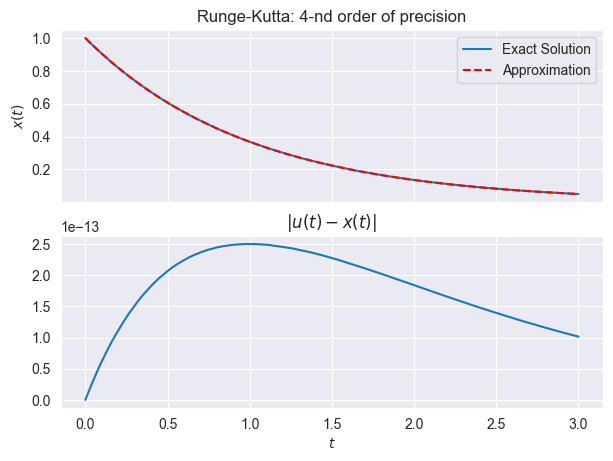

In [12]:
fg, ax = plt.subplots(2, 1, figsize=(7, 5), dpi=100, sharex=True)
ax[0].set_title("Runge-Kutta: 4-nd order of precision")
ax[0].plot(t, np.exp(-t), label='Exact Solution')
ax[0].plot(t, u, '--r', label='Approximation')
ax[0].legend(loc='best')
ax[0].set_ylabel(r"$x(t)$")

runge_kutta4Error = np.abs(x - u)

ax[1].plot(t, runge_kutta4Error)
ax[1].set_xlabel(r"$t$")
ax[1].set_title(r"$|u(t) - x(t)|$")
plt.show()

## Analyze methods above

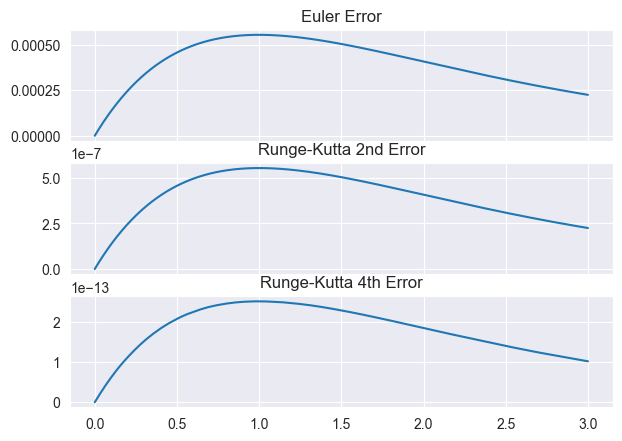

In [13]:
fg, ax = plt.subplots(3, 1, figsize=(7, 5), dpi=100, sharex=True)

ax[0].plot(t, eulerError)
ax[0].set_title("Euler Error")

ax[1].plot(t, runge_kutta2Error)
ax[1].set_title("Runge-Kutta 2nd Error")

ax[2].plot(t, runge_kutta4Error)
ax[2].set_title("Runge-Kutta 4th Error")

assert np.max(eulerError) > np.max(runge_kutta2Error) > np.max(runge_kutta4Error)